In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
n_samples = 1000
constraint = 'ordered'  # 'ordered', 'contiguous', or 'none'
sloth_mapping = pd.read_csv(f'test_mapping_{constraint}_git_{n_samples}samples.csv', sep=';')
sloth_LCS = pd.read_csv(f'test_sloth_{constraint}_git_{n_samples}samples.csv', sep=';')

print(f'len(sloth_mapping): {len(sloth_mapping)}')
print(f'len(sloth_LCS): {len(sloth_LCS)}')

len(sloth_mapping): 1000
len(sloth_LCS): 1000


In [3]:
def summary_stats(data):
    return {
        "min": round(np.min(data), 3),
        "max": round(np.max(data), 3),
        "mean": round(np.mean(data), 3),
        "std_dev": round(np.std(data), 3),
        "positive_ratio": round(np.sum(data > 0) / len(data), 3),
        "negative_ratio": round(np.sum(data < 0) / len(data), 3),
        "zero_ratio": round(np.sum(data == 0) / len(data), 3),
    }

In [15]:
sloth_mapping = sloth_mapping[sloth_LCS['a%'] == sloth_mapping['a%']]
sloth_LCS = sloth_LCS.iloc[sloth_mapping.index]

In [15]:
sloth_mapping[sloth_mapping['seeds'] == -1]

,r_id,s_id,seeds,algo,a%,time,gen_cands,gen_time,ver_cands,ver_time,idx
1,seek_time_csv_licensed.zip_PL1331LAGRZW3H.csv,seek_time_csv_licensed.zip_PL2331LAGMH50J.csv,-1,e,0.0,10.378400,0,0.0,0,0.0,1
19,seek_time_csv_licensed.zip_PL1331LAGT91DH.csv,seek_time_csv_licensed.zip_PL2331LAGUKWPJ.csv,-1,e,0.0,10.342268,0,0.0,0,0.0,19
29,seek_time_csv_licensed.zip_PL1331LAGSPWAH.csv,seek_time_csv_licensed.zip_PL2331LAGRWJEJ.csv,-1,e,0.0,10.332385,0,0.0,0,0.0,29
44,seek_time_csv_licensed.zip_PL1331LAGTUBXH.csv,seek_time_csv_licensed.zip_PL2331LAGMA23J.csv,-1,e,0.0,10.316065,0,0.0,0,0.0,44
47,seek_time_csv_licensed.zip_PL1331LAGSAS9H.csv,seek_time_csv_licensed.zip_PL2331LAGN2MSJ.csv,-1,e,0.0,10.320933,0,0.0,0,0.0,47
...,...,...,...,...,...,...,...,...,...,...,...
915,seek_time_csv_licensed.zip_PL1331LAGT9M4H.csv,seek_time_csv_licensed.zip_PL2331LAGMYHRJ.csv,-1,e,0.0,10.323912,0,0.0,0,0.0,915
930,seek_time_csv_licensed.zip_PL1331LAGSAA5H.csv,seek_time_csv_licensed.zip_WD-WCC4N0876416.csv,-1,e,0.0,10.315369,0,0.0,0,0.0,930
956,seek_time_csv_licensed.zip_PL1331LAGTU53H_1.csv,seek_time_csv_licensed.zip_PL2331LAGN1B4J.csv,-1,e,0.0,10.325115,0,0.0,0,0.0,956
959,seek_time_csv_licensed.zip_PL1331LAGM2ZPH.csv,seek_time_csv_licensed.zip_PL1331LAGT4XSH.csv,-1,e,0.0,10.316745,0,0.0,0,0.0,959


In [16]:
sloth_LCS[sloth_LCS['seeds'] == -1]

,r_id,s_id,seeds,algo,a%,time,gen_cands,gen_time,ver_cands,ver_time


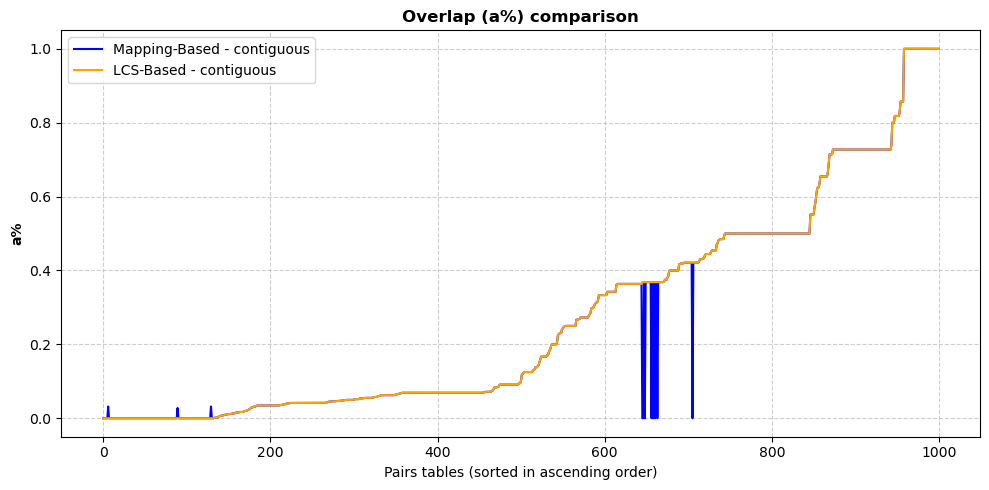

In [4]:
# Imposta il grafico
plt.figure(figsize=(10, 5))
sloth_LCS_ord = sloth_LCS.sort_values(by='a%')
sloth_mapping_ord = sloth_mapping.loc[sloth_LCS_ord.index]
# sloth_ord = sloth.sort_values(by='a%')
plt.plot(sloth_mapping_ord['a%'].values, color='blue', label=f'Mapping-Based - {constraint}', markersize=4)
plt.plot(sloth_LCS_ord['a%'].values, color='orange', label=f'LCS-Based - {constraint}',markersize=4)

plt.title("Overlap (a%) comparison", fontweight='bold')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.ylabel("a%", fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
print("=== SLOTH Mapping ===")
sloth_mapping_stats = summary_stats(sloth_mapping['a%'].values)
for k, v in sloth_mapping_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH LCS ===")
sloth_LCS_stats = summary_stats(sloth_LCS['a%'].values)
for k, v in sloth_LCS_stats.items():
    print(f"{k}: {v}")

print("\n=== GAP (SLOTH Mapping - SLOTH LCS) ===")
delta = sloth_mapping['a%'].values - sloth_LCS['a%'].values
gap_stats = summary_stats(delta)
for k, v in gap_stats.items():
    print(f"{k}: {v}")

=== SLOTH Mapping ===
min: 0.0
max: 1.0
mean: 0.272
std_dev: 0.286
positive_ratio: 0.869
negative_ratio: 0.0
zero_ratio: 0.131

=== SLOTH LCS ===
min: 0.0
max: 1.0
mean: 0.272
std_dev: 0.286
positive_ratio: 0.869
negative_ratio: 0.0
zero_ratio: 0.131

=== GAP (SLOTH Mapping - SLOTH LCS) ===
min: 0.0
max: 0.0
mean: 0.0
std_dev: 0.0
positive_ratio: 0.0
negative_ratio: 0.0
zero_ratio: 1.0


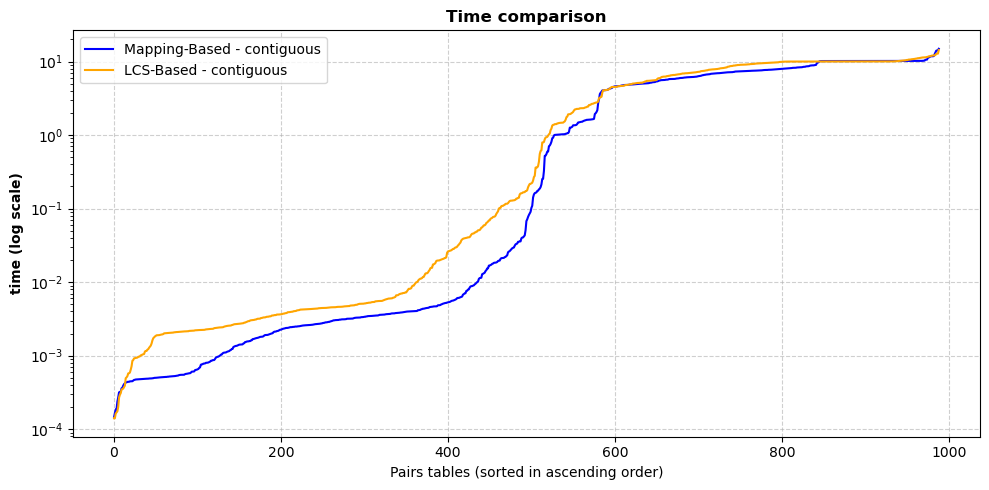

In [19]:
# Imposta il grafico
plt.figure(figsize=(10, 5))
sloth_LCS_ord = sloth_LCS.sort_values(by='time')
sloth_mapping_ord = sloth_mapping.sort_values(by='time')
# sloth_ord = sloth.loc[sloth_constr_ord.index]

plt.plot(sloth_mapping_ord['time'].values, color='blue', label=f'Mapping-Based - {constraint}', markersize=4)
plt.plot(sloth_LCS_ord['time'].values, color='orange', label=f'LCS-Based - {constraint}', markersize=4)
plt.title("Time comparison", fontweight='bold')
plt.yscale('log')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.ylabel("time (log scale)", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [21]:
print("=== SLOTH mapping ===")
sloth_stats = summary_stats(sloth_mapping['time'].values)
for k, v in sloth_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH LCS ===")
sloth_LCS_stats = summary_stats(sloth_LCS['time'].values)
for k, v in sloth_LCS_stats.items():
    print(f"{k}: {v}")

print("\n=== GAP (SLOTH mapping - SLOTH LCS) ===")
delta = sloth_mapping['time'].values - sloth_LCS['time'].values
gap_stats = summary_stats(delta)
for k, v in gap_stats.items():
    print(f"{k}: {v}")

=== SLOTH mapping ===
min: 0.0
max: 14.91
mean: 3.355
std_dev: 4.094
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0

=== SLOTH LCS ===
min: 0.0
max: 14.344
mean: 3.673
std_dev: 4.352
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0

=== GAP (SLOTH mapping - SLOTH LCS) ===
min: -5.636
max: 6.98
mean: -0.318
std_dev: 1.22
positive_ratio: 0.266
negative_ratio: 0.734
zero_ratio: 0.0


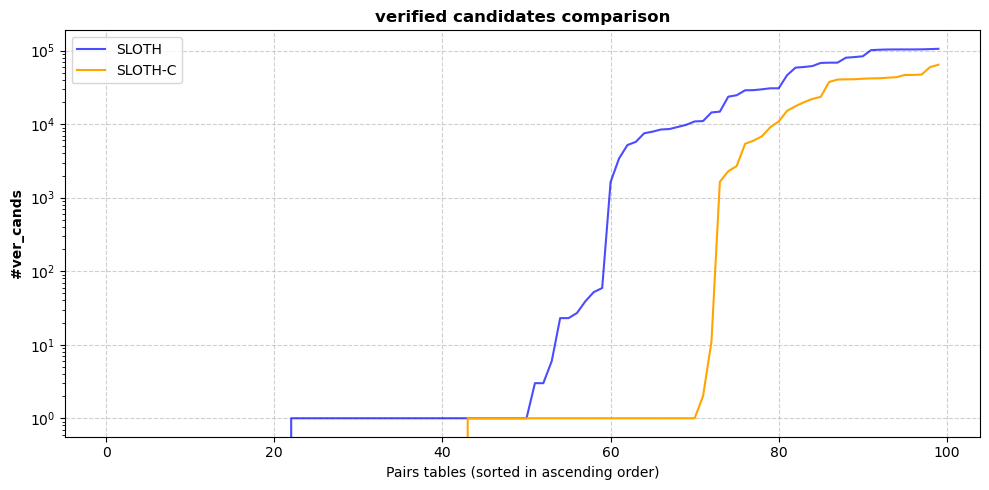

In [11]:
# Imposta il grafico
plt.figure(figsize=(10, 5))
cands_sloth_c_ord = sloth_constr.sort_values(by='ver_cands')
cands_sloth_ord = sloth.sort_values(by='ver_cands')
plt.plot(cands_sloth_ord['ver_cands'].values, color='blue', label='SLOTH', markersize=4, alpha=0.7)
plt.plot(cands_sloth_c_ord['ver_cands'].values, color='orange', label='SLOTH-C', markersize=4)
plt.title("verified candidates comparison", fontweight='bold')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.yscale('log')
plt.ylabel("#ver_cands", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [12]:
print("=== SLOTH ===")
cands_sloth_stats = summary_stats(sloth['ver_cands'].values)
for k, v in cands_sloth_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH-C ===")
cands_sloth_c_stats = summary_stats(sloth_constr['ver_cands'].values)
for k, v in cands_sloth_c_stats.items():
    print(f"{k}: {v}")

print("\n=== GAP (SLOTH - SLOTH-C) ===")
delta = sloth['ver_cands'].values - sloth_constr['ver_cands'].values
gap_stats = summary_stats(delta)
for k, v in gap_stats.items():
    print(f"{k}: {v}")

=== SLOTH ===
min: 0
max: 105868
mean: 19279.79
std_dev: 33731.018
positive_ratio: 0.78
negative_ratio: 0.0
zero_ratio: 0.22

=== SLOTH-C ===
min: 0
max: 64254
mean: 7786.95
std_dev: 16077.472
positive_ratio: 0.57
negative_ratio: 0.0
zero_ratio: 0.43

=== GAP (SLOTH - SLOTH-C) ===
min: -5400
max: 83004
mean: 11492.84
std_dev: 20127.567
positive_ratio: 0.56
negative_ratio: 0.03
zero_ratio: 0.41


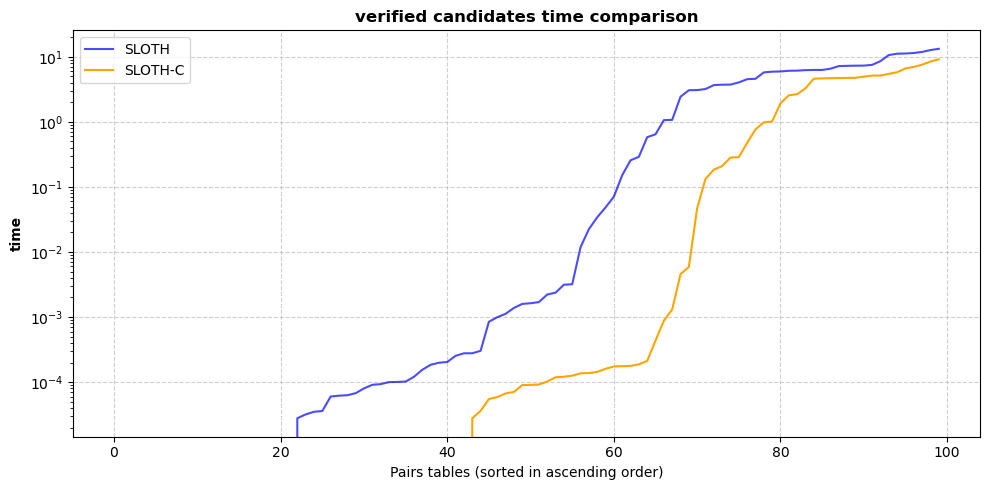

In [13]:
# Imposta il grafico
plt.figure(figsize=(10, 5))
cands_sloth_c_ord = sloth_constr.sort_values(by='ver_time')
cands_sloth_ord = sloth.sort_values(by='ver_time')
plt.plot(cands_sloth_ord['ver_time'].values, color='blue', label='SLOTH', markersize=4, alpha=0.7)
plt.plot(cands_sloth_c_ord['ver_time'].values, color='orange', label='SLOTH-C', markersize=4)
plt.title("verified candidates time comparison", fontweight='bold')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.yscale('log')
plt.ylabel("time", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

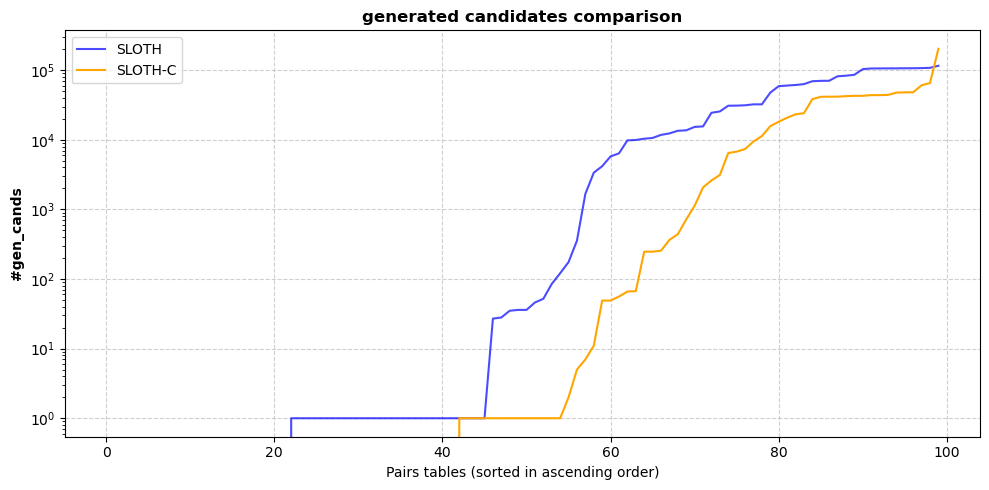

In [14]:
plt.figure(figsize=(10, 5))
cands_sloth_c_ord = sloth_constr.sort_values(by='gen_cands')
cands_sloth_ord = sloth.sort_values(by='gen_cands')
plt.plot(cands_sloth_ord['gen_cands'].values, color='blue', label='SLOTH', markersize=4, alpha=0.7)
plt.plot(cands_sloth_c_ord['gen_cands'].values, color='orange', label='SLOTH-C', markersize=4)
plt.title("generated candidates comparison", fontweight='bold')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.yscale('log')
plt.ylabel("#gen_cands", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [15]:
print("=== SLOTH ===")
cands_sloth_stats = summary_stats(sloth['gen_cands'].values)
for k, v in cands_sloth_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH-C ===")
cands_sloth_c_stats = summary_stats(sloth_constr['gen_cands'].values)
for k, v in cands_sloth_c_stats.items():
    print(f"{k}: {v}")

print("\n=== GAP (SLOTH - SLOTH-C) ===")
delta = sloth['gen_cands'].values - sloth_constr['gen_cands'].values
gap_stats = summary_stats(delta)
for k, v in gap_stats.items():
    print(f"{k}: {v}")

=== SLOTH ===
min: 0
max: 115548
mean: 21742.57
std_dev: 35768.317
positive_ratio: 0.78
negative_ratio: 0.0
zero_ratio: 0.22

=== SLOTH-C ===
min: 0
max: 202546
mean: 10491.08
std_dev: 25536.665
positive_ratio: 0.58
negative_ratio: 0.0
zero_ratio: 0.42

=== GAP (SLOTH - SLOTH-C) ===
min: -143641
max: 115546
mean: 11251.49
std_dev: 28292.299
positive_ratio: 0.53
negative_ratio: 0.16
zero_ratio: 0.31
